# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
from pandas_datareader import data as web
from plotly import graph_objects

import yfinance as yf
import plotly.express as px
import datetime
import plotly.io as pio

#pio.renderers.default='notebook'
yf.pdr_override()

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

1 - Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.

In [2]:
# selecionando os 3 ativos
ativos = [
    'ITUB3.SA', 
    'PETR4.SA', 
    'VALE3.SA'
]

# definindo a data de 2 anos atrás
data = datetime.datetime.now()
data_2_anos = data - datetime.timedelta(days=365 * 2)

# consultando os dados de 2 anos atrás para os ativos
df = web.get_data_yahoo(ativos, start=data_2_anos)

# visualizando os dados
df.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                            Close                        \
             ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2021-10-15  19.890305  12.390561  69.922684  22.100000  29.600000  80.680000   
2021-10-18  20.124311  12.327772  69.264015  22.360001  29.450001  79.919998   
2021-10-19  19.602301  11.724987  68.466690  21.780001  28.010000  79.000000   
2021-10-20  20.124311  11.930102  66.447350  22.360001  28.500000  76.669998   
2021-10-21  19.854301  11.490572  65.138695  22.059999  27.450001  75.160004   

                 High                              Low                        \
             ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2021-10-15  22.180000  29.840000  80.949997  21.600000  29.510000  79.300003   
2021-10-18  22.459999  29.639999  80.400002  21.730000  28.990000  78.480003   
2021-10-19  22.190001  29.320000  80.239998  21.700001  27.860001  78.809998   
2021-10-20  22.400000  28.799999  78.370003  21.790001  27.950001  76.279999   
2021-10-21  22.450001  28.180000  75.160004  21.629999  26.920000  72.949997   

                 Open                         Volume                       
             ITUB3.SA   PETR4.SA   VALE3.SA ITUB3.SA   PETR4.SA  VALE3.SA  
Date                                                                       
2021-10-15  21.660000  29.799999  79.489998  2044900   72479900  26927200  
2021-10-18  21.959999  29.400000  79.910004  1711400   68971300  20912800  
2021-10-19  22.190001  29.240000  79.720001   822200  111484000  20804500  
2021-10-20  22.000000  28.270000  78.370003  1799800   56063300  27576600  
2021-10-21  21.950001  27.860001  74.500000  1680600  101567700  37556500

2 - Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [3]:
df.to_csv('ativos.csv')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [4]:
# empilhando os dados e renomeando as colunas para salvar o DataFrame em CSV
df = df.stack().reset_index().rename(columns={
    'Date': 'data',
    'level_1': 'ativo',
    'Adj Close': 'adj_close',
    'Close': 'close',
    'High': 'high',
    'Low': 'low',
    'Open': 'open',
    'Volume': 'volume',
    
})

In [5]:
df.head()

,data,ativo,adj_close,close,high,low,open,volume
0,2021-10-15,ITUB3.SA,19.890305,22.100000,22.180000,21.600000,21.660000,2044900
1,2021-10-15,PETR4.SA,12.390561,29.600000,29.840000,29.510000,29.799999,72479900
2,2021-10-15,VALE3.SA,69.922684,80.680000,80.949997,79.300003,79.489998,26927200
3,2021-10-18,ITUB3.SA,20.124311,22.360001,22.459999,21.730000,21.959999,1711400
4,2021-10-18,PETR4.SA,12.327772,29.450001,29.639999,28.990000,29.400000,68971300


In [6]:
# Calcule a amplitude de variação do valor do ativo dentro do dia. 
# Essa amplitude você pode calcular com um comando simples de 
# adicionar uma coluna no Pandas: (valor máximo - valor mínimo).

df['amplitude'] = df['high'] - df['low']

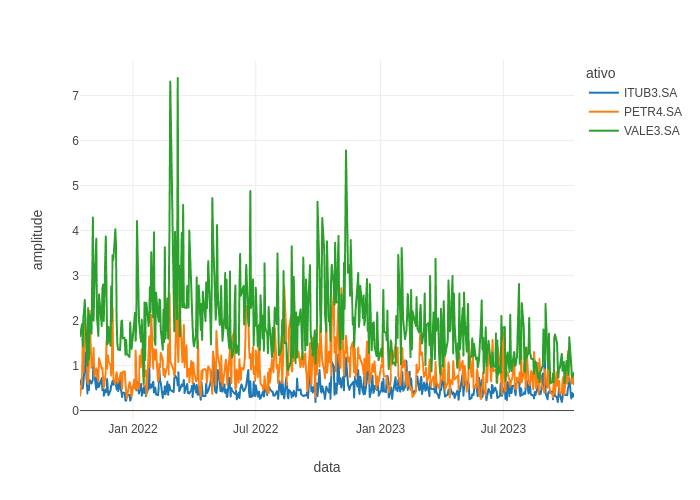

In [10]:
# Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.

fig = px.line(df, x='data', y='amplitude', color='ativo', template='none')
#fig.show(renderer='notebook')
fig.show('png')

#### Veja se consegue identificar que ativo apresentou maior volatilidade.

Entre os ativos selecionados o que apresentou maior volatilidade foi o VALE3.SA